# Practica 2
Luis Enrique Garcia Gutierrez <br>
202010814

# Lectura de Datos
Leer el archivo con pandas y verificar que la cantidad de datos sea correcta

In [123]:
import pandas as pd
import numpy as np
df = pd.read_csv("./data/datos.csv", thousands=",")
len(df)

9595

# Limpieza de datos
1. Eliminar filas donde el rating esta vacio
2. Reemplazar valores de Level vacios por Not Specified
3. Estandarizar valores de Duration

In [125]:
#1. Rating 
df.dropna(subset=['Rating'], inplace=True)
len(df)


8156

In [127]:
#2. Level
df["Level"].fillna("Not Specified", inplace = True)
print(len(df))

8156


### Estandarización de Duration
1. Extraer el numero de meses y horas y almacenarlo en months
2. Reemplazar valor NaN por 0
3. Obtener las horas totales por la cantidad de n meses. meses * horas * 30
4. Obtener el total de horas con una condicion.

In [128]:

df.dropna(subset=["Duration"], inplace=True)
len(df)
df["months"] = df["Duration"].where(df["Duration"].str.contains("months"))


In [129]:
import re
df['months_month'] = df['months'].str.extract(r'(\d+)\s*months')[0].astype(float)
df['months_hour'] = df['months'].str.extract(r'(\d+)\s*hours')[0].astype(float)

# reemplazar NaN por 0
df["months_month"] = df["months_month"].fillna(0)
df['months_hour'] = df["months_hour"].fillna(0)

df['hours_per_month'] = df['months_month'] * df['months_hour'] * 30

num = 0
for month, months_month, months_hour, hours_per_month in zip(df['months'], df['months_month'], df['months_hour'], df["hours_per_month"] ):
    print(f"months: {month},  months_month: {months_month}, months_hour: {months_hour}, hour_per_mont: {hours_per_month}")
    num+=1

    if num == 33:
        break


months: nan,  months_month: 0.0, months_hour: 0.0, hour_per_mont: 0.0
months: nan,  months_month: 0.0, months_hour: 0.0, hour_per_mont: 0.0
months: nan,  months_month: 0.0, months_hour: 0.0, hour_per_mont: 0.0
months: nan,  months_month: 0.0, months_hour: 0.0, hour_per_mont: 0.0
months: nan,  months_month: 0.0, months_hour: 0.0, hour_per_mont: 0.0
months: nan,  months_month: 0.0, months_hour: 0.0, hour_per_mont: 0.0
months: nan,  months_month: 0.0, months_hour: 0.0, hour_per_mont: 0.0
months: nan,  months_month: 0.0, months_hour: 0.0, hour_per_mont: 0.0
months: nan,  months_month: 0.0, months_hour: 0.0, hour_per_mont: 0.0
months: nan,  months_month: 0.0, months_hour: 0.0, hour_per_mont: 0.0
months: nan,  months_month: 0.0, months_hour: 0.0, hour_per_mont: 0.0
months: nan,  months_month: 0.0, months_hour: 0.0, hour_per_mont: 0.0
months: nan,  months_month: 0.0, months_hour: 0.0, hour_per_mont: 0.0
months: nan,  months_month: 0.0, months_hour: 0.0, hour_per_mont: 0.0
months: nan,  months

In [130]:
pattern = r'(\d+.*?hours)'
df['hours'] = df['Duration'].str.extract(pattern)

# extraer hora
df['hours_hour'] = df['hours'].str.extract(r'(\d+)\s*hours')[0].astype(float)

# cambiar NaN por 0
df['hours_hour'] = df['hours_hour'].fillna(0)

print(df[["Duration", 'hours', 'hours_hour', "hours_per_month"]])

                          Duration     hours  hours_hour  hours_per_month
0         20 hours (approximately)  20 hours        20.0              0.0
1     Approx. 34 hours to complete  34 hours        34.0              0.0
2          9 hours (approximately)   9 hours         9.0              0.0
4     Approx. 11 hours to complete  11 hours        11.0              0.0
5      Approx. 5 hours to complete   5 hours         5.0              0.0
...                            ...       ...         ...              ...
9588  Approx. 21 hours to complete  21 hours        21.0              0.0
9589  Approx. 11 hours to complete  11 hours        11.0              0.0
9590   Approx. 7 hours to complete   7 hours         7.0              0.0
9592   Approx. 5 hours to complete   5 hours         5.0              0.0
9593                        1 hour       NaN         0.0              0.0

[8046 rows x 4 columns]


Condicion: Si hours_per_month es cero asignamos el valor de hours_hour que se obtiene cuando no hay month en duration. CAso contrario asignamos el hours_per_month que es el valor obtenido cuando hay month en duration.

In [131]:
df['Total_Hours'] = np.where(df['hours_per_month'] == 0, df['hours_hour'], df['hours_per_month'])

print(df[['hours', 'hours_hour', 'hours_per_month', 'Total_Hours']].to_string())

num = 0
for hours, hours_hour, hours_per_month, Total_Hours in zip(df['hours'], df['hours_hour'], df['hours_per_month'], df["Total_Hours"] ):
    print(f"hours: {hours},  hours_hours: {hours_hour}, hours_per_month: {hours_per_month}, total_hours: {Total_Hours}")
    num+=1

    if num == 33:
        break

                         hours  hours_hour  hours_per_month  Total_Hours
0                     20 hours        20.0              0.0         20.0
1                     34 hours        34.0              0.0         34.0
2                      9 hours         9.0              0.0          9.0
4                     11 hours        11.0              0.0         11.0
5                      5 hours         5.0              0.0          5.0
6                     13 hours        13.0              0.0         13.0
8                      5 hours         5.0              0.0          5.0
9                     44 hours        44.0              0.0         44.0
10                    10 hours        10.0              0.0         10.0
11                    26 hours        26.0              0.0         26.0
12                    12 hours        12.0              0.0         12.0
13                    10 hours        10.0              0.0         10.0
14                    21 hours        21.0         

### Reemplazar valores de Schedule vacios


In [132]:
df["Schedule"].fillna("Not Specified")
print(len(df))

8046


### Obtener valores de review -> formato numero reviews
1. Reemplazar , por . debido a que hay
2. Extraer el numero de reviews
3. Cambiar valores Nan por 0 en caso de existir

In [145]:
df['Review'] = df['Review'].str.replace(',', '')

df['Reviews'] = df['Review'].str.extract(r'(\d+(,\d+)?)')[0].astype(float)

df['Reviews'] = df['Reviews'].fillna(0)

#print(df[['Review', 'Reviews']].to_string())





### Data limpia

In [147]:
print(df[['Course Title', 'Rating', 'Level', 'Schedule', 'Total_Hours', 'Reviews', 'Keyword']].to_string())

                                                                                                                                             Course Title  Rating               Level           Schedule  Total_Hours   Reviews                           Keyword
0                                                                                                                                       Fashion as Design     4.8      Beginner level  Flexible schedule         20.0    2813.0               Arts and Humanities
1                                                                                                                                  Modern American Poetry     4.4      Beginner level  Flexible schedule         34.0     100.0               Arts and Humanities
2                                                                                                                               Pixel Art for Video Games     4.5      Beginner level  Flexible schedule          9.0     227.0   

# Calculos

### Promedio de calificaciones
Calculo del promedio de calificaciones para cada curso en el conjunto de datos.
1. Agrupar los datos por titulo de curso
2. Calcular el promedio de las calificaciones para cada grupo


In [148]:
avg_ratings = df.groupby('Course Title')['Rating'].mean()

print(avg_ratings.to_string())

Course Title
 Assisting Public Sector Decision Makers With Policy Analysis                                                                                          4.800000
 Atención prehospitalaria del ictus agudo y selección de pacientes para tratamiento endovascular con la escala RACE                                    4.900000
 Build a social media presence for your business using Canva                                                                                           4.700000
 Comercio, Inmigración y Tipos de Cambio en un Mundo Globalizado                                                                                       4.900000
 FPGA computing systems: Background knowledge and introductory materials                                                                               4.600000
 Future Healthcare Payment Models                                                                                                                      4.500000
 How to create Social Media

### Cursos con mayor y menor Rating

In [149]:
curso_max = df.loc[df['Rating'].idxmax()]

curso_min = df.loc[df['Rating'].idxmin()]

print("Curso con mayor rating:")
print(curso_max[['Course Title', 'Rating']].to_string())

print("\nCurso con menor rating:")
print(curso_min[['Course Title', 'Rating']].to_string())

Curso con mayor rating:
Course Title    Songwriting: Writing the Music
Rating                                     5.0

Curso con menor rating:
Course Title    Coding for Beginners: An Easy Introduction
Rating                                                 3.0


### Porcentaje de cursos con horario flexible
Porcentaje de cursos con horarios flexibles en relacion con el total de cursos en el conjunto de datos.
1. Filtrar los cursos con horario flexible
2. Agruparlos por cursos
3. Calcular el porcentaje de esos cursos con respecto al total de cursos en el conjunto de datos original y redondear a dos decimales.

In [150]:
flexibles = df[df['Schedule'] == 'Flexible schedule']

cursos_flexibles = flexibles.groupby('Course Title')
cursos = df.groupby('Course Title')

percentage = len(cursos_flexibles) / len(cursos) * 100

print('Procentaje de cursos con horario flexible:', round(percentage, 2), '%') 

Procentaje de cursos con horario flexible: 95.6 %


# Analisis

## Analisis de limpieza de datos
Se puede ver que la utilización de las librerías Pandas y NumPy son de gran ayuda e importancia para realizar la manipulación de los datos y, en este caso, limpiar los datos del dataset que se proveyó. Sus funciones para eliminar y reemplazar valores nulos, crear nuevas columnas, y entre otros fueron de gran utilidad.

## Analisis de calculo de promedio
Se puede ver que a pesar de la gran cantidad de cursos y ratings, la mayoría cuenta con una calificación bastante alta, por lo cual se puede determinar que los cursos son de buena calidad y los usuarios están satisfechos.

## Analisis de calculo de curso con mayor y menor rating.
El curso Songwriting: Writing the Music es el mejor valorado, por lo cual se puede decir que es el favorito de los usuarios. A diferencia del curso Coding for Beginners: An Easy Introductions, que a pesar de no tener una mala calificación, parece que no cumple con las expectativas de los usuarios.

## Analisis del porcentaje de cursos con horario flexible
Se puede ver que la mayoría de los cursos tienen horario flexible, lo cual tiene bastante sentido debido a la facilidad de proveer esta opción al ser una plataforma de cursos virtual.

# Analisis con NLP

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Luis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Luis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Luis\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Luis\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Luis\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Luis\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[

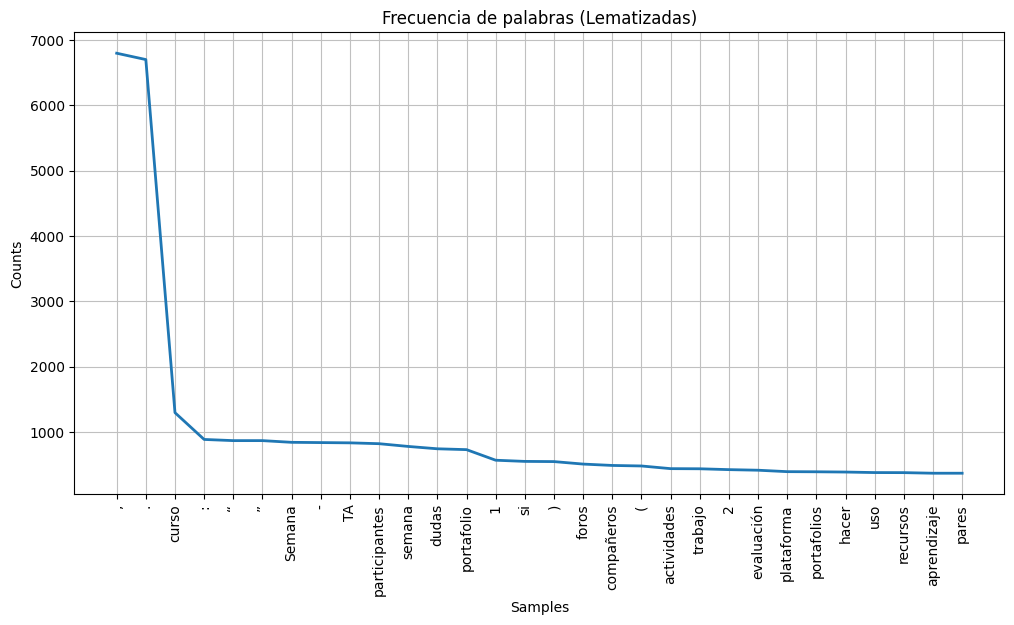

Análisis de sentimientos:
Positivo: 0.011
Negativo: 0.035
Neutral: 0.954
Compuesto: -1.0

Tokens originales: ['Abril', 'Vargas', 'Pérez', '3', 'opiniones', 'PT', 'Valorada', 'con', '5', 'estrellas', 'sobre', '5', '21', 'ago', '2024', 'Escandalizada', 'y', 'confundida', 'por', 'las…']

Tokens sin palabras vacías: ['Abril', 'Vargas', 'Pérez', '3', 'opiniones', 'PT', 'Valorada', '5', 'estrellas', '5', '21', 'ago', '2024', 'Escandalizada', 'confundida', 'las…', 'Escandalizada', 'confundida', 'malas', 'reseñas']

Tokens lematizados: ['Abril', 'Vargas', 'Pérez', '3', 'opiniones', 'PT', 'Valorada', '5', 'estrellas', '5', '21', 'ago', '2024', 'Escandalizada', 'confundida', 'las…', 'Escandalizada', 'confundida', 'malas', 'reseñas']

Tokens con stemming: ['abril', 'varg', 'perez', '3', 'opinion', 'pt', 'valor', '5', 'estrell', '5', '21', 'ago', '2024', 'escandaliz', 'confund', 'las…', 'escandaliz', 'confund', 'mal', 'reseñ']

Palabras más frecuentes (lematizadas): [(',', 6799), ('.', 6702), ('cu

In [151]:
import nltk
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk import pos_tag, ne_chunk  
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.probability import FreqDist
from nltk.sentiment import SentimentIntensityAnalyzer

# Descargar recursos necesarios
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')
nltk.download('omw-1.4')
nltk.download('punkt_tab')
nltk.download('maxent_ne_chunker')
nltk.download('words')

# Leer el archivo de texto
with open('data/Coursera Comments.txt', 'r', encoding='utf-8') as file:
    texto = file.read()

# Tokenización
tokens = word_tokenize(texto)

# Eliminación de palabras vacías que no aportan mucho al analiis.
stop_words = set(stopwords.words('spanish'))
tokens_sin_stopwords = [palabra for palabra in tokens if palabra.lower() not in stop_words]

# Lematización
lemmatizer = WordNetLemmatizer()
tokens_lematizados = [lemmatizer.lemmatize(palabra) for palabra in tokens_sin_stopwords]

# Stemming
stemmer = SnowballStemmer('spanish')
tokens_stemming = [stemmer.stem(palabra) for palabra in tokens_sin_stopwords]

# Frecuencia de palabras lematizadas
fdist = FreqDist(tokens_lematizados)

# Gráfico de frecuencia de palabras
plt.figure(figsize=(12, 6))
fdist.plot(30, cumulative=False)
plt.title('Frecuencia de palabras (Lematizadas)')
plt.show()

# Análisis de sentimientos
sia = SentimentIntensityAnalyzer()
sentimiento = sia.polarity_scores(texto)

print("Análisis de sentimientos:")
print(f"Positivo: {sentimiento['pos']}")
print(f"Negativo: {sentimiento['neg']}")
print(f"Neutral: {sentimiento['neu']}")
print(f"Compuesto: {sentimiento['compound']}")

# Imprimir los resultados
print("\nTokens originales:", tokens[:20])
print("\nTokens sin palabras vacías:", tokens_sin_stopwords[:20])
print("\nTokens lematizados:", tokens_lematizados[:20])
print("\nTokens con stemming:", tokens_stemming[:20])
print("\nPalabras más frecuentes (lematizadas):", fdist.most_common(10))

# Comparación de lematización vs stemming
print("\nComparación de Lematización vs Stemming:")
for original, lematizado, stemmed in zip(tokens_sin_stopwords[:20], tokens_lematizados[:20], tokens_stemming[:20]):
    print(f"Original: {original:<15} Lematizado: {lematizado:<15} Stemming: {stemmed:<15}")

## Análisis

### Tokenización

Se puede ver que los tokens originales incluyen palabras sin tanta importancia, como "con", lo cual no agrega valor al análisis. Por lo tanto se concluye que los tokens generales deben ser filtrados para poder ser analizados con mayor precisión.

### Lematización y Stemming

Se puede ver en la lematización como las palabras conservan su estructura, a diferencia del stemming donde varias palabras únicamente cuentan con su raíz.

### Eliminación de palabras vacias

Se puede ver que se eliminan algunas palabras vacías que no proveen contexto al análisis, pudiendo permitir el enfoque en las palabras que tienen más valor.

### Frecuencia de palabras

Omitiendo los caracteres especiales, se puede ver que las palabras "Curso" y "Semana" se repiten con alta frecuencia, lo cual es simplemente un reflejo de que los datos son acerca de una página de cursos virtual.

### Analisis de sentimientos

Se determina que el sentimiento total es neutral, lo cual indica que los usuarios se encuentran satisfechos con el producto, aunque tal vez podría ser mejor.

## Reconocimiento de entidades nombradas


In [152]:
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('maxent_ne_chunker_tab')

#sentence = "Apple is looking at buying U.K. startup for $1 billion."
#tokens = word_tokenize(sentence)
pos_tags = pos_tag(tokens)

named_entities = ne_chunk(pos_tags)
print(named_entities)

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Luis\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     C:\Users\Luis\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping chunkers\maxent_ne_chunker_tab.zip.


(S
  (PERSON Abril/NNP)
  (PERSON Vargas/NNP Pérez/NNP)
  3/CD
  opiniones/NNS
  (ORGANIZATION PT/NNP Valorada/NNP)
  con/VBD
  5/CD
  estrellas/NNS
  sobre/VBD
  5/CD
  21/CD
  ago/RB
  2024/CD
  Escandalizada/NNP
  y/CC
  confundida/JJ
  por/NN
  las…/NN
  (PERSON Escandalizada/NNP)
  y/NNP
  confundida/NN
  por/NN
  las/VBZ
  malas/NNS
  reseñas/NN
  ./.
  (PERSON Estoy/NNP)
  en/IN
  coursera/NN
  desde/NN
  el/JJ
  mes/NNS
  de/IN
  julio/NN
  2024/CD
  y/NN
  estoy/CC
  haciendo/NN
  actualmente/NN
  el/FW
  curso/NN
  de/IN
  front-end/JJ
  developer/NN
  que/NN
  imparte/NN
  (ORGANIZATION Meta/NNP)
  ./.
  (PERSON Para/NNP)
  entrar/VBD
  a/DT
  este/NN
  curso/NN
  tenías/NN
  que/NN
  pagar/NN
  (PERSON Coursera/NNP Plus/NNP)
  ,/,
  donde/NN
  tienes/NNS
  acceso/VBP
  a/DT
  todos/JJ
  los/NN
  cursos/NN
  por/NN
  45/CD
  euros/NN
  mensuales/NNS
  ./.
  (PERSON Duré/NNP)
  en/IN
  un/JJ
  periodo/NN
  de/IN
  prueba/FW
  gratis/NN
  de/IN
  7/CD
  días/NNS
  y/RB
  al/VB

### Analisis
Se puede ver que se muestran todas las entidades o palabras usadas en las reseñas que dejaron los usuarios, lo cual es útil para el análisis de los datos.

# Graficas

## Gráfica de barras de cursos por nivel. 

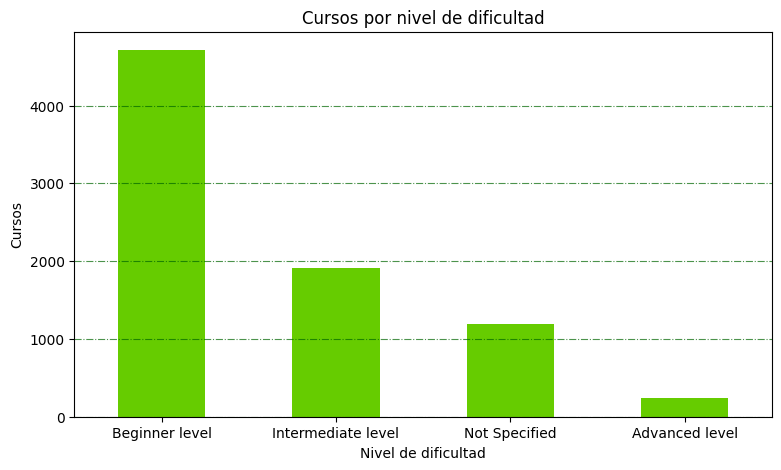

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns
# grafica de barras
duracion_cursos = df['Level'].value_counts()

plt.figure(figsize=(9, 5))
duracion_cursos.plot(kind='bar', color='#66cc00')
plt.title('Cursos por nivel de dificultad')
plt.grid(True, which='both', axis='y', linestyle='-.', color='#006600', alpha=0.7)
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
plt.xlabel('Nivel de dificultad')
plt.ylabel('Cursos')
plt.xticks(rotation=0)
plt.show()

## Analisis de grafica
Se puede observar que existen en su mayoria cursos de nivel principiante lo cual demuestra que la plataforma es bastante util para alguien que esta intentando aprender nuevas habilidades sin tener conocimiento previo.

## Gráfica de barras horizontal por categoría.

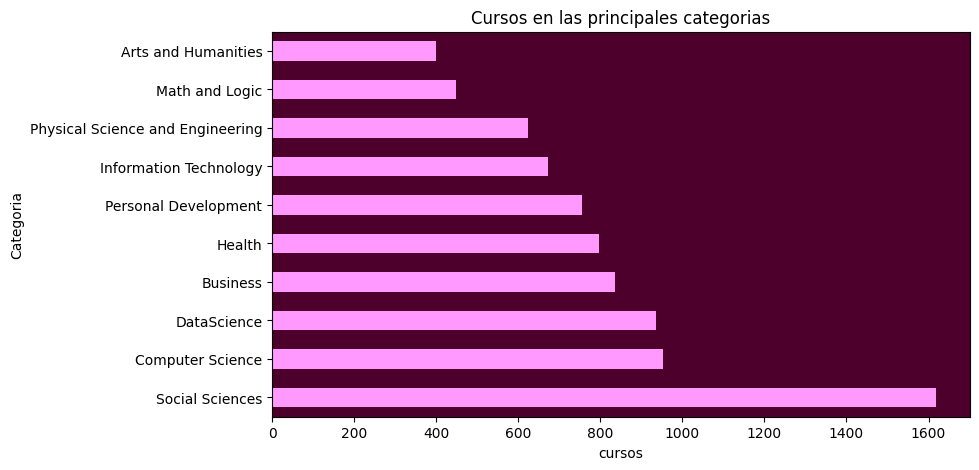

In [155]:
duracion_cursos = df["Keyword"].value_counts()

plt.figure(figsize=(9, 5))
ax = plt.axes()
ax.set_facecolor("#4d002B")

duracion_cursos.plot(kind="barh", color="#ff99ff")
plt.title("Cursos en las principales categorias")
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = ["DejaVu Sans"]
plt.xlabel("cursos")
plt.ylabel("Categoria")
plt.xticks(rotation=0)
plt.show()

### Analisis
Se puede ver que predominan los cursos de Ciencias sociales lo que demuestra que el publico tiene cierto interes en temas sociales y de desarrollo, por lo cual se destacan las plataformas de cursos virtuales.

## Gráfico de dispersión entre duración y número de revisiones. 

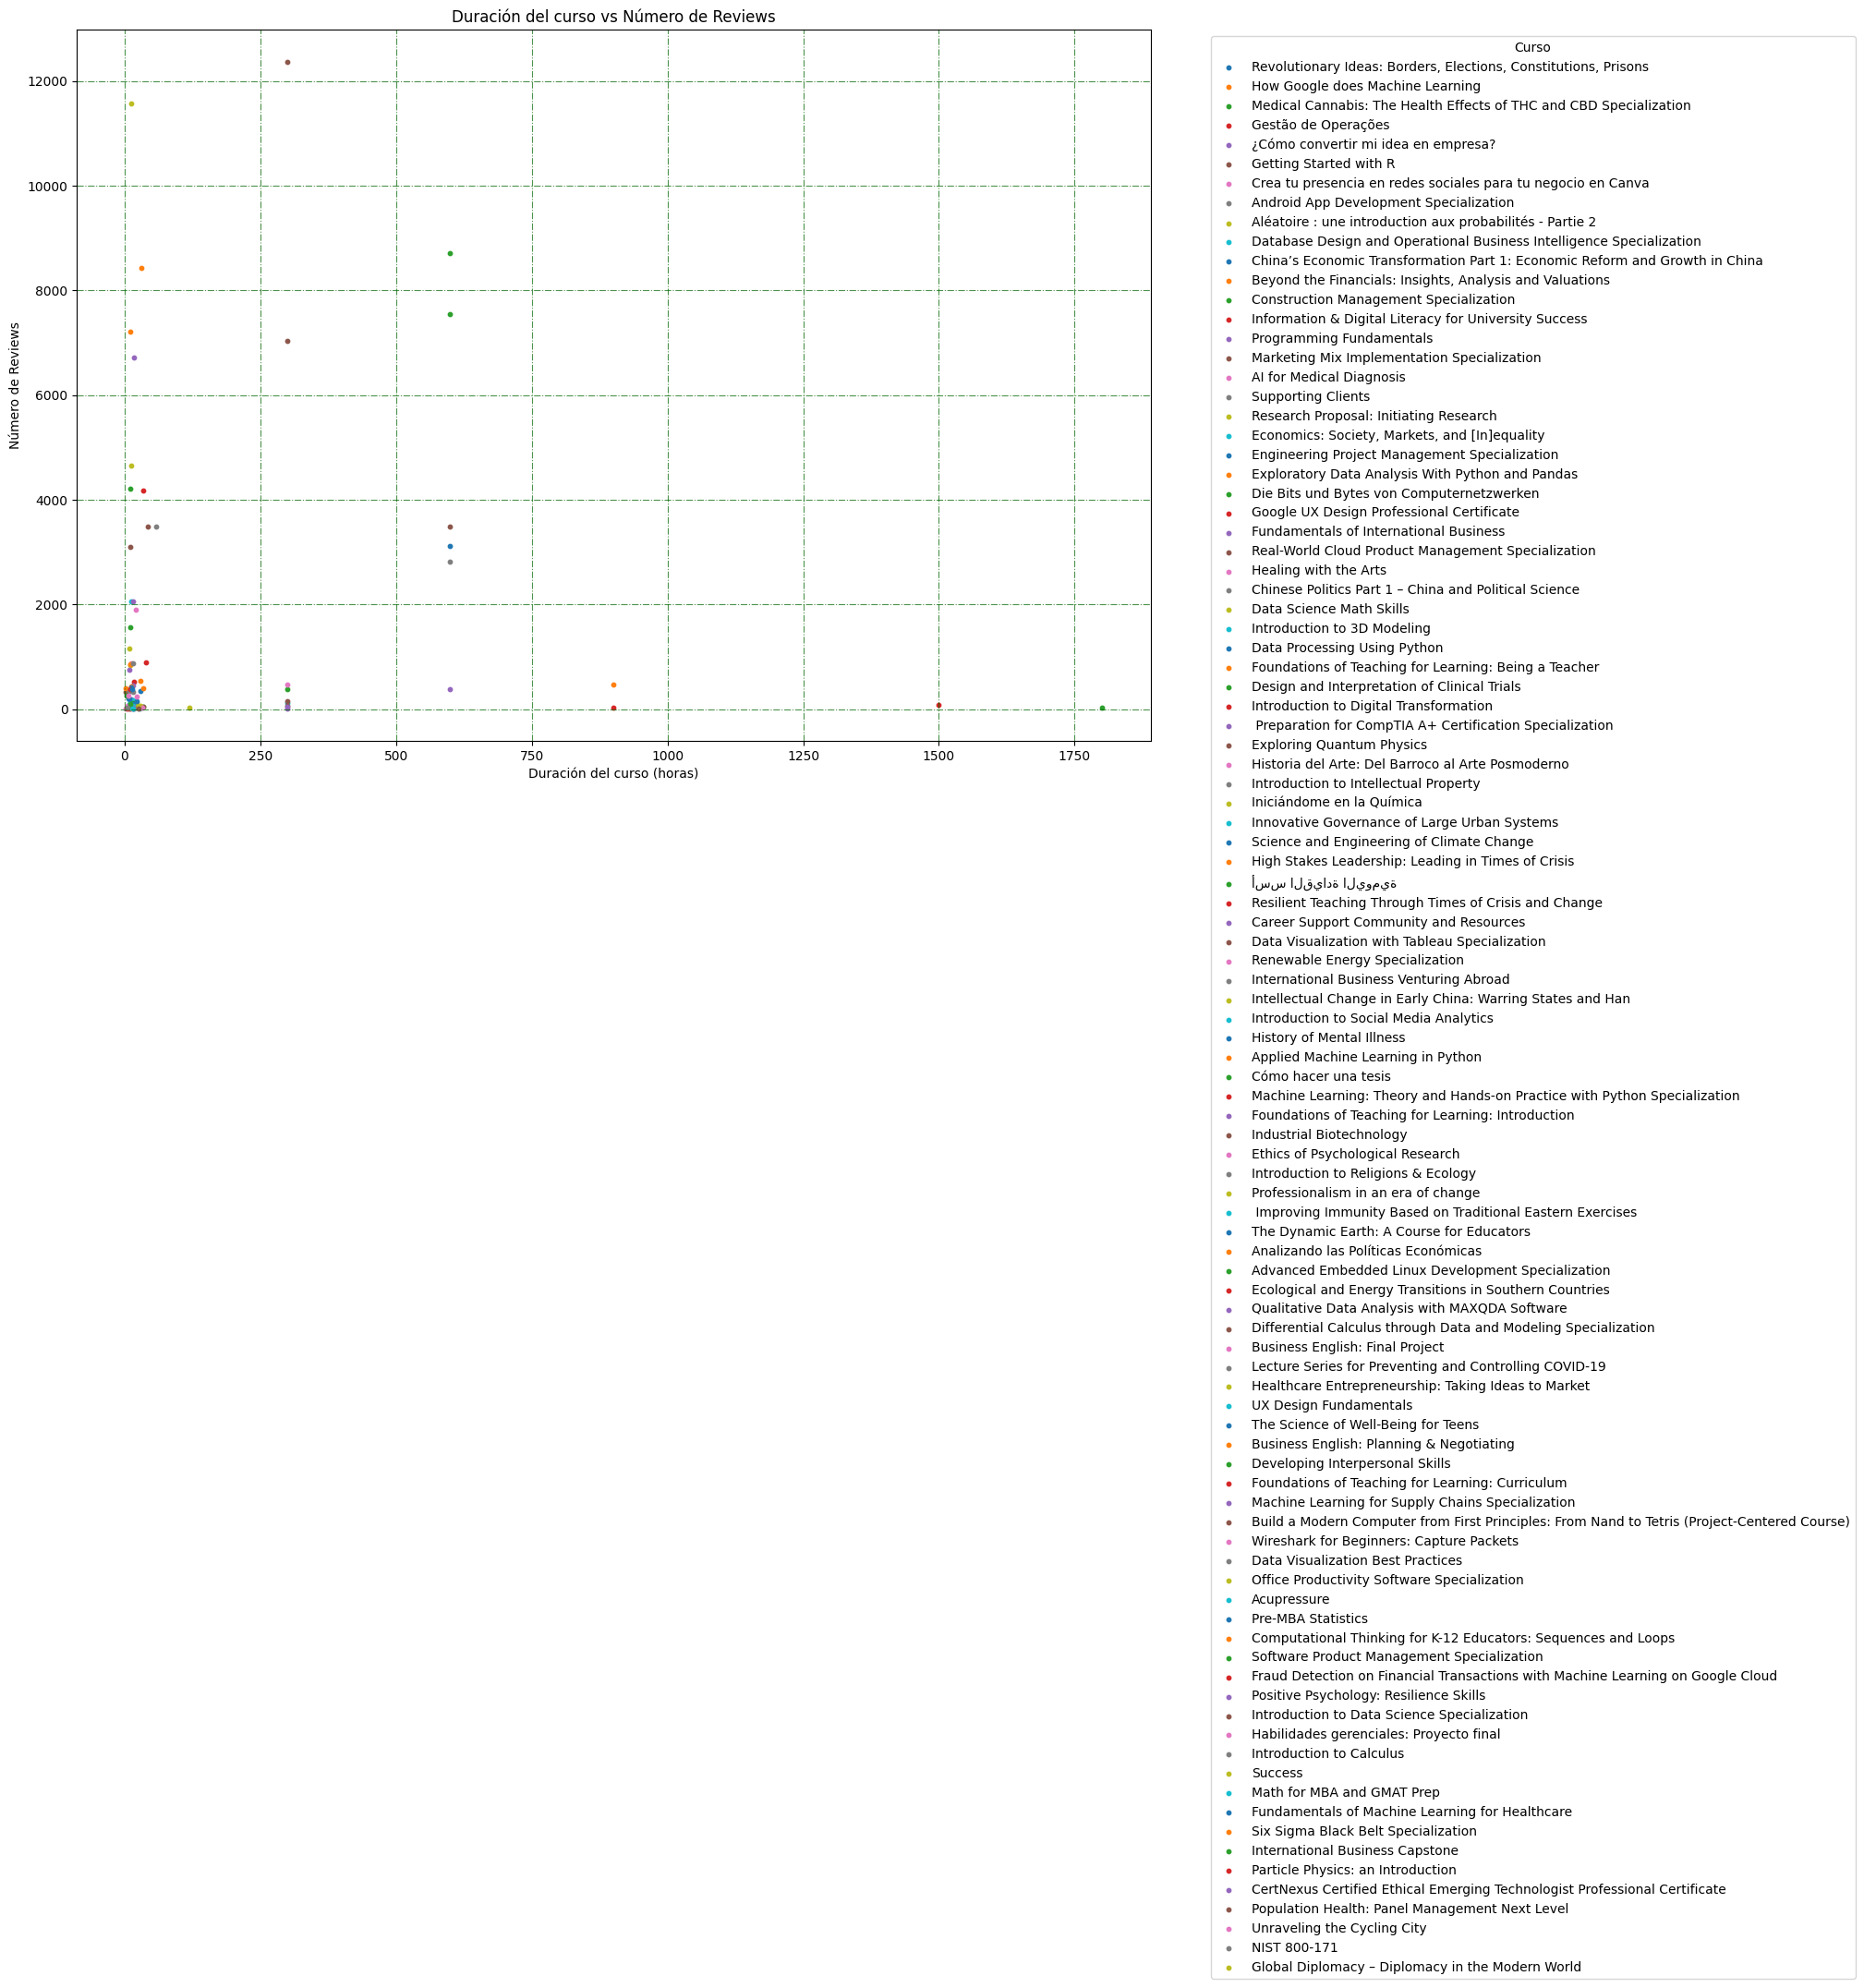

In [156]:
df_sample = df.sample(n=100, random_state=1)

plt.figure(figsize=(15, 10))
for curso in df_sample["Course Title"].unique():
    curso_data = df_sample[df_sample["Course Title"] == curso]
    plt.scatter(curso_data['Total_Hours'], curso_data['Reviews'], label=curso, s=10)

plt.title('Duración del curso vs Número de Reviews')
plt.grid(True, which='both', axis='both', linestyle='-.', color='#006600', alpha=0.7)
plt.xlabel('Duración del curso (horas)')
plt.ylabel('Número de Reviews')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), title="Curso", ncol=1)
plt.show()


## Analisis
Por la grafica se puede ver que mientras más corto sea un curso, más probabilidades tiene de recibir Reseñas. Esto tiene sentido ya que hay menos probabilidades de que los usuarios completen un curso mientras más largo sea este.

## Histograma de duración de cursos.

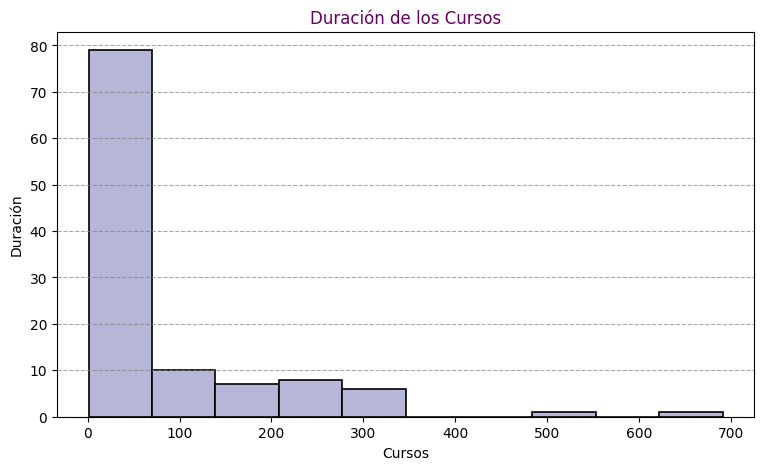

In [157]:
# histograma
duracion_cursos = df['Total_Hours'].value_counts()

plt.figure(figsize=(9, 5))

# Definir colores para un degradado
colors = plt.cm.Purples(np.linspace(0.4, 0.8, len(duracion_cursos)))

duracion_cursos.plot(kind='hist', color=colors, edgecolor='black', linewidth=1.2)
plt.title('Duración de los Cursos', color='#660066')
plt.grid(True, which='both', axis='y', linestyle='--', color='gray', alpha=0.7)
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
plt.xlabel('Cursos')
plt.ylabel('Duración')
plt.xticks(rotation=0)
plt.show()

## Analisis
Se puede observar que la gran mayoria de cursos tienen una duracion menor de 10 horas, lo que indica que son bastantes cortos. Hay menos de 100 cursos que duran 80 horas. Esto indica que los creadores y los usuarios prefieren cursos cortos ya que son más rapidos y fáciles de completar.

## Boxplot de calificaciones por nivel de dificultad.

C:\Users\Luis\AppData\Local\Temp\ipykernel_16420\440213427.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Level', y='Reviews', data=df, palette={'Beginner level': 'skyblue', 'Intermediate level': 'lightgreen', 'Advanced level': 'salmon', 'Not Specified': 'yellow'})


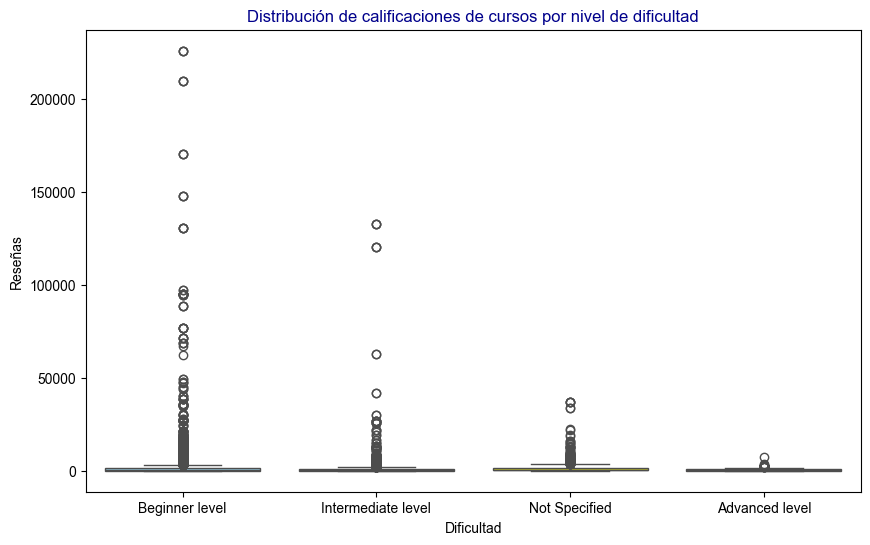

In [158]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Level', y='Reviews', data=df, palette={'Beginner level': 'skyblue', 'Intermediate level': 'lightgreen', 'Advanced level': 'salmon', 'Not Specified': 'yellow'})
sns.set_style('ticks')
plt.title('Distribución de calificaciones de cursos por nivel de dificultad', color='darkblue')
plt.xlabel('Dificultad')
plt.ylabel('Reseñas')
plt.show()

## Analisis
Se puede observar que la mayoria de reseñas las tienen cursos con nivel principiante. Mientras que un curso con mayor dificultad va consiguiendo menos reseñas, esto puede darse a que el porcentaje de personas que completen estos cursos es menor al porcentaje de personas que completan los cursos mas faciles.

# Conclusiones

## Conclusion general
Con respecto a la información de la plataforma virtual, podemos observar que los cursos más calificados y en demanda son los que tienen un nivel básico y además no tienen mucha duracion, por lo que es importante mantener buenas ofertas en estos cursos. Tambien podemos destacar que la calificacion promedio de los cursos no es mala, lo que significa que los cursos son de buena calidad.

## Uso de Python en el análisis de datos
Python con librerias como Pandas facilitan la manipulación y analisis de datos ya que es posible limpiarlos y crar reportes a través de estos. El analisis de los datos se pudo realizar de manera facil y rapida gracias a las herramientas y funciones con las que se trabajaron, lo cual permitira tomar decisiones basado en los resultados obtenidos.